In [1]:
# pip install chart-studio

In [2]:
# pip install plotly==2.7.0

In [3]:
# pip install statsmodels

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import os
# print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

# DATA LOAD

In [5]:
# bombing data
aerial = pd.read_csv("./datasets/operations.csv",parse_dates=True)
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("./datasets/Weather Station Locations.csv",parse_dates=True)
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("./datasets/Summary of Weather.csv",parse_dates=True)

Data Description
I only explain data features that we will use in this kernel.
  

Aerial bombing Data description:
Mission Date: Date of mission
Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
Country: Country that makes mission or operation like USA
Air Force: Name or id of air force unity like 5AF
Aircraft Series: Model or type of aircraft like B24
Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
Takeoff Location: takeoff region Sicily
Takeoff Latitude: Latitude of takeoff region
Takeoff Longitude: Longitude of takeoff region
Target Country: Target country like Germany
Target City: Target city like Berlin
Target Type: Type of target like city area
Target Industry: Target industy like town or urban
Target Priority: Target priority like 1 (most)
Target Latitude: Latitude of target
Target Longitude: Longitude of target  

Weather Condition data description:
Weather station location:
WBAN: Weather station number
NAME: weather station name
STATE/COUNTRY ID: acronym of countries
Latitude: Latitude of weather station
Longitude: Longitude of weather station
Weather:
STA: eather station number (WBAN)
Date: Date of temperature measurement
MeanTemp: Mean temperature

In [6]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [7]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Target 

In [8]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [9]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


# DATA VISUALIZATION

Country
USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: count, dtype: int64


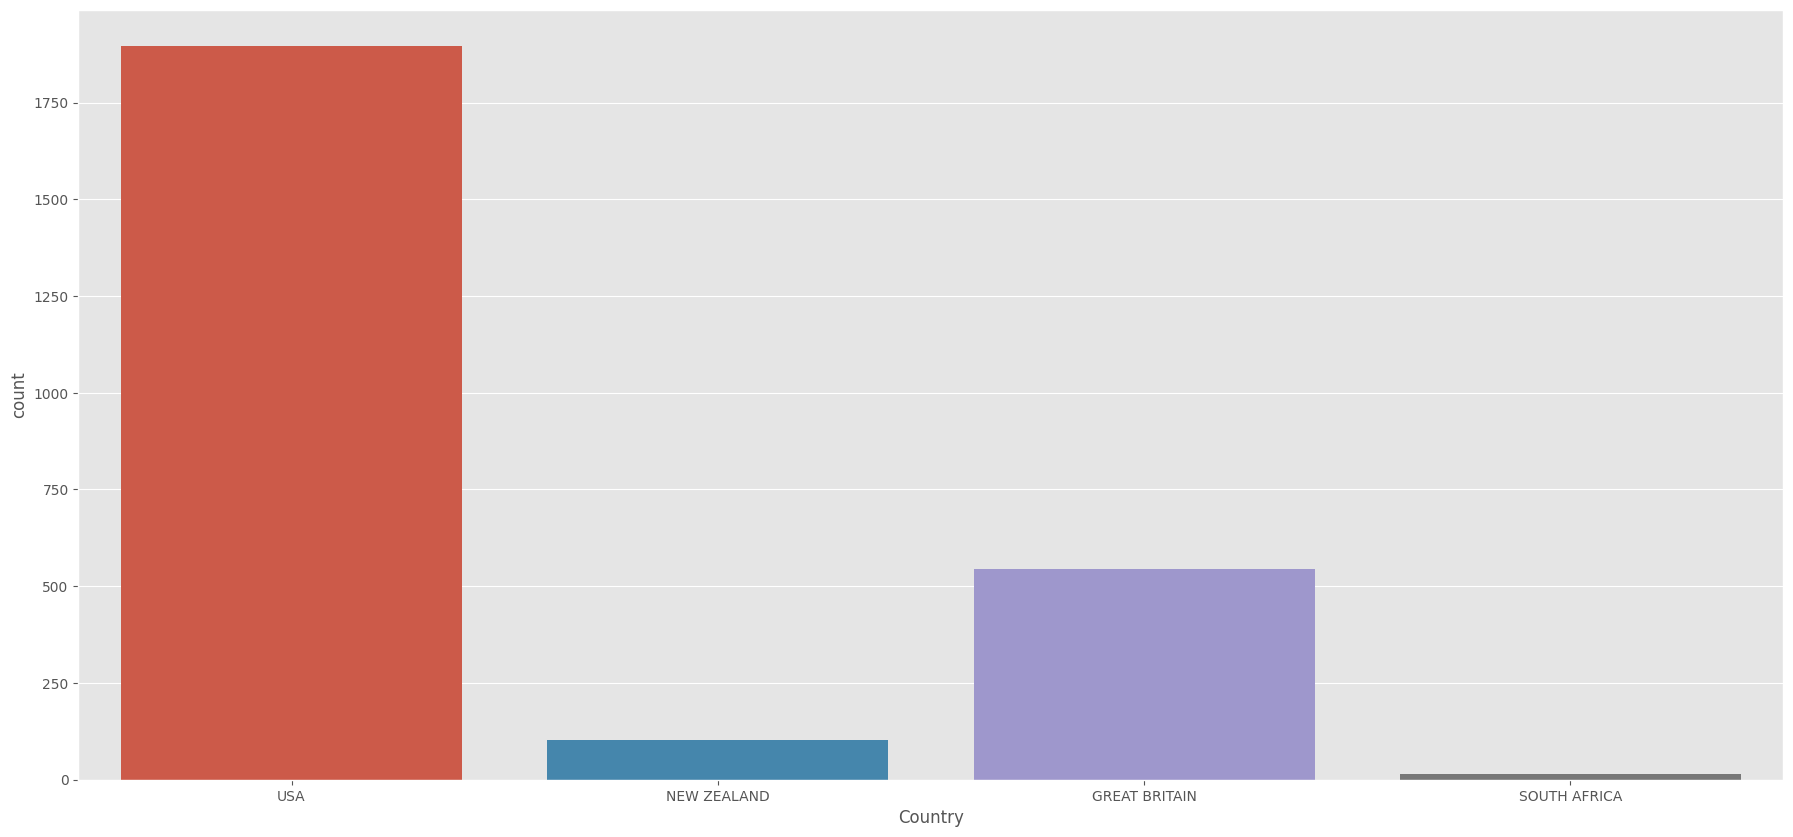

In [10]:
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial, x ='Country')
plt.show()

Target Country
ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: count, dtype: int64


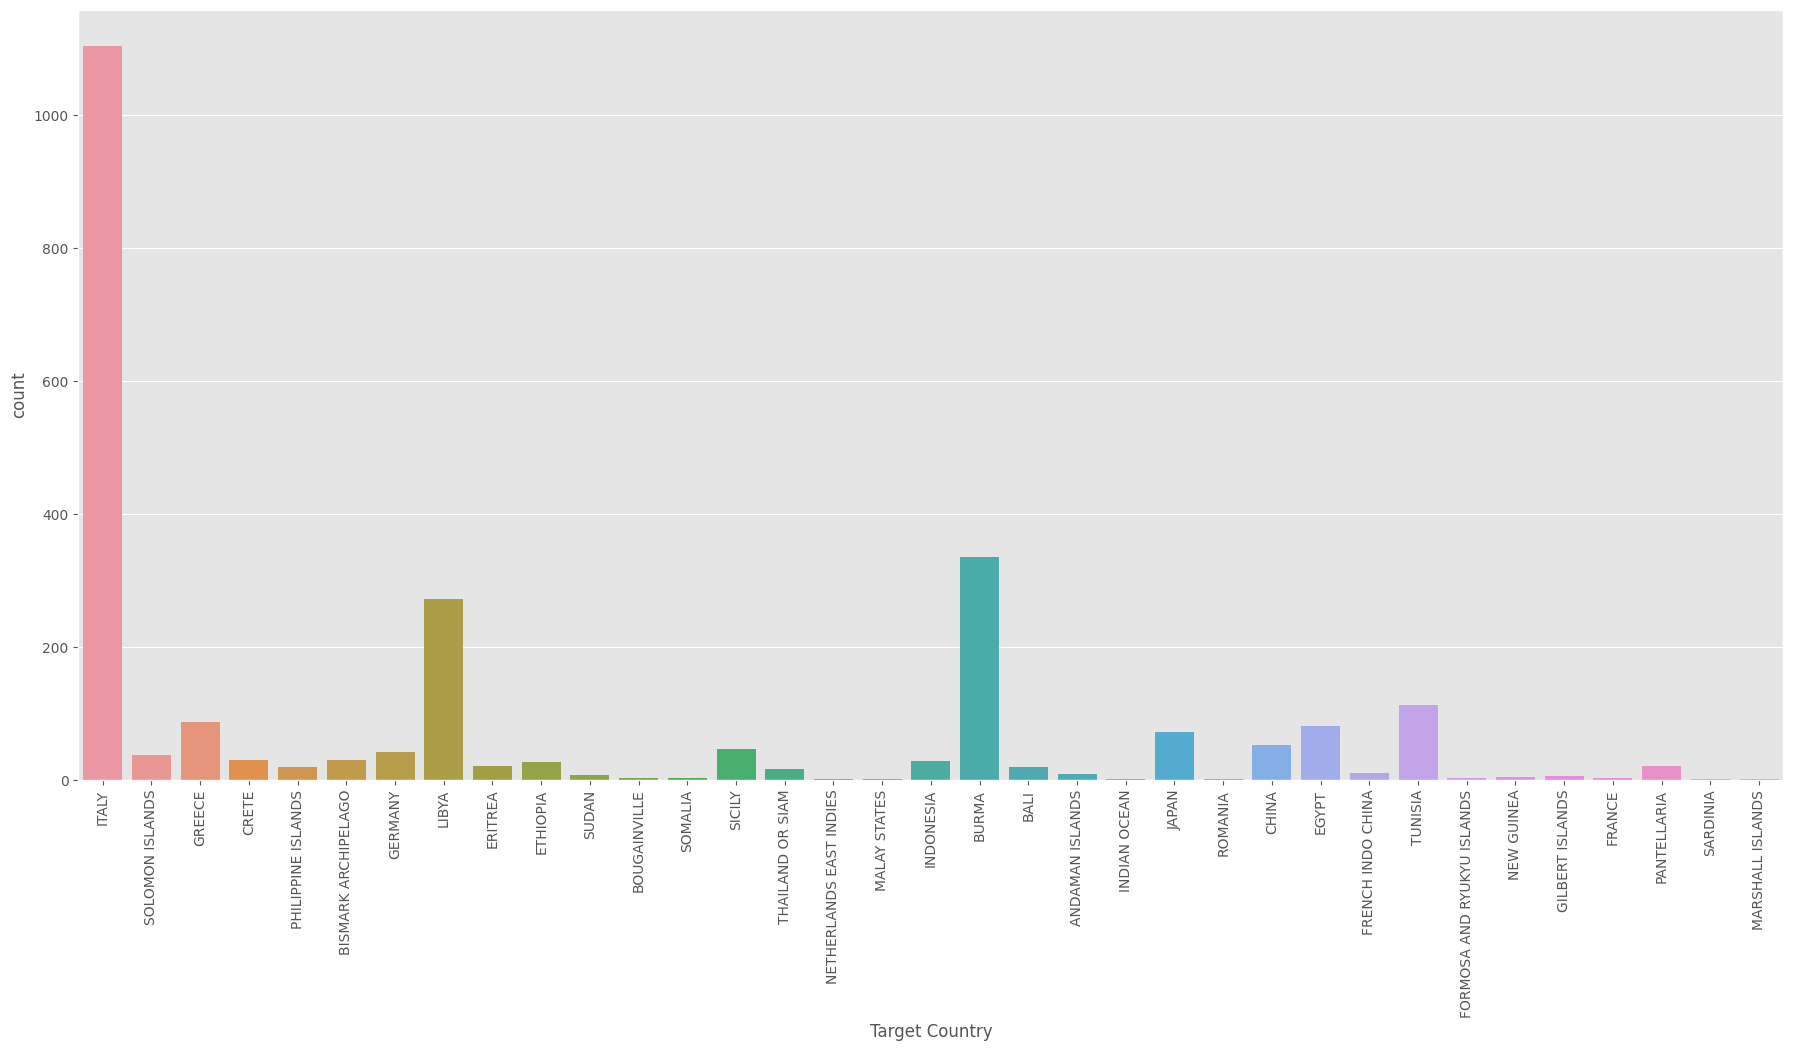

In [11]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial, x='Target Country')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Aircraft Series
A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: count, dtype: int64


In [13]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
# Bombing paths
# trace1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]
# trace2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        
# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

Theater of Operations
MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: count, dtype: int64


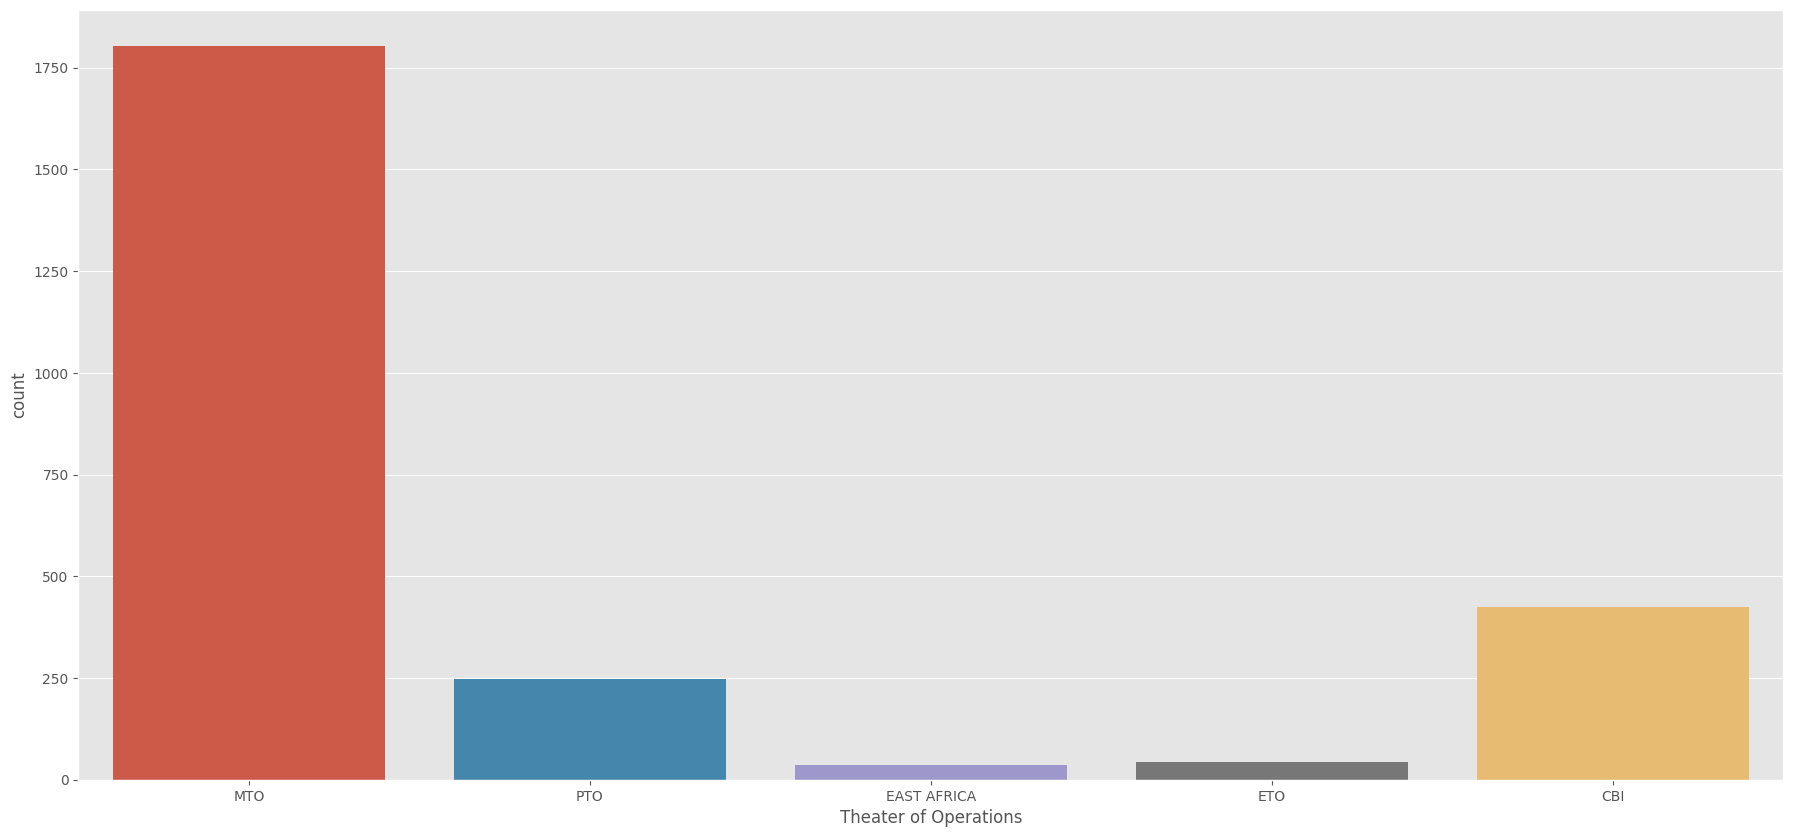

In [15]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial,x='Theater of Operations')
plt.show()

In [16]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

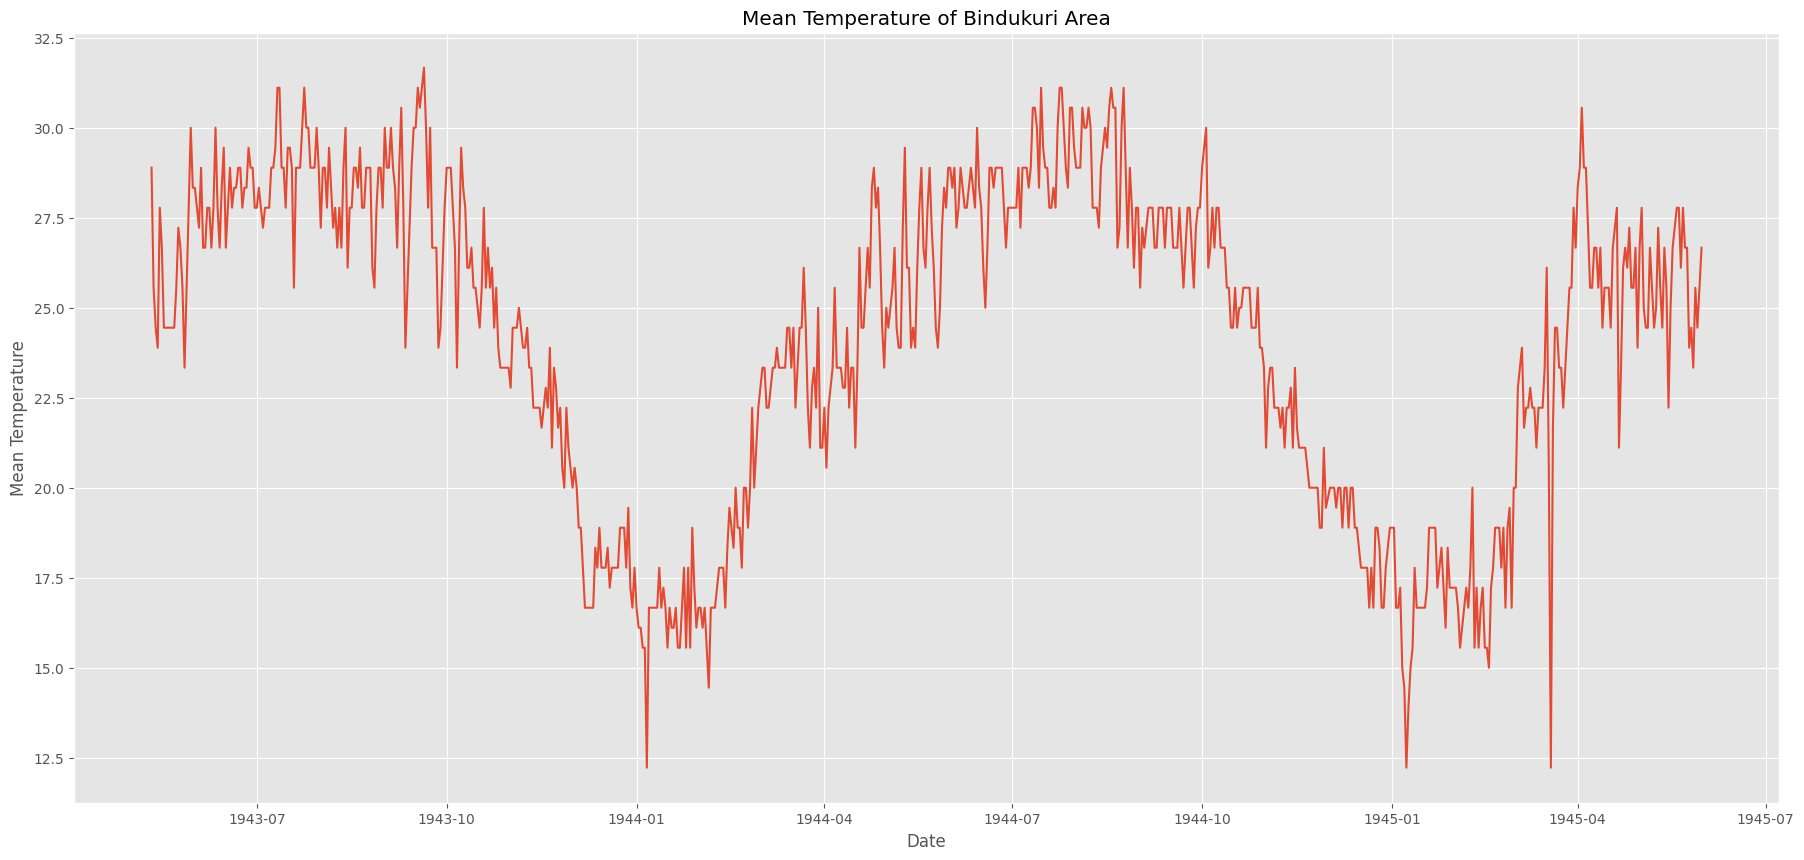

In [17]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [18]:
aerial = pd.read_csv("./datasets/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [19]:
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

# Prediction

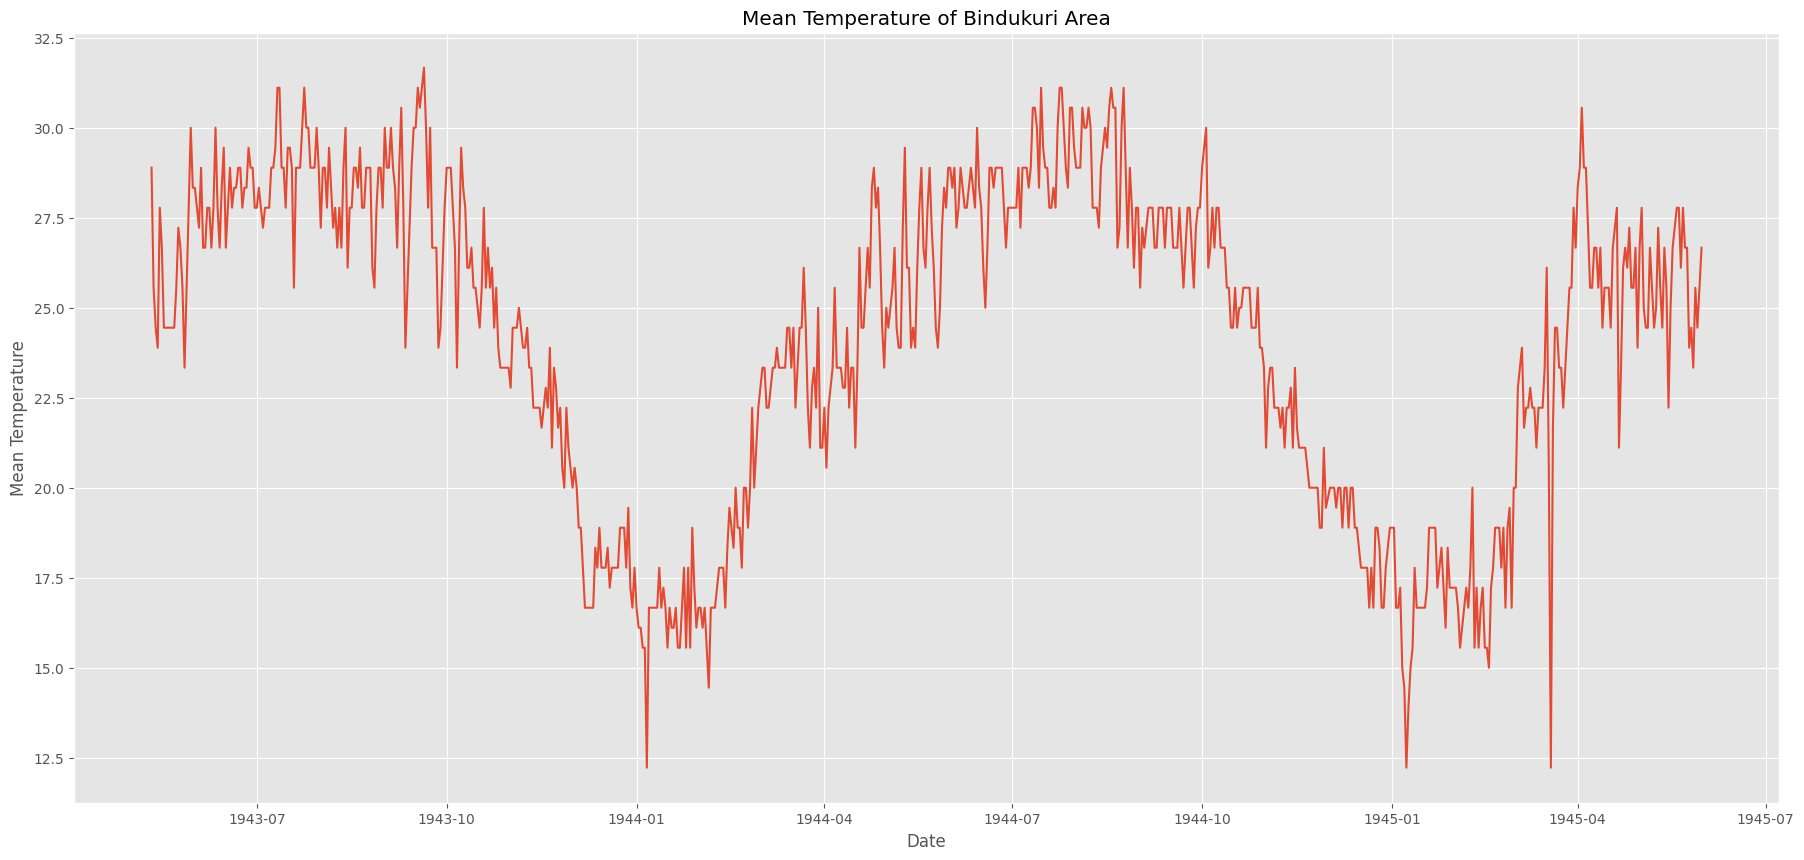

In [20]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

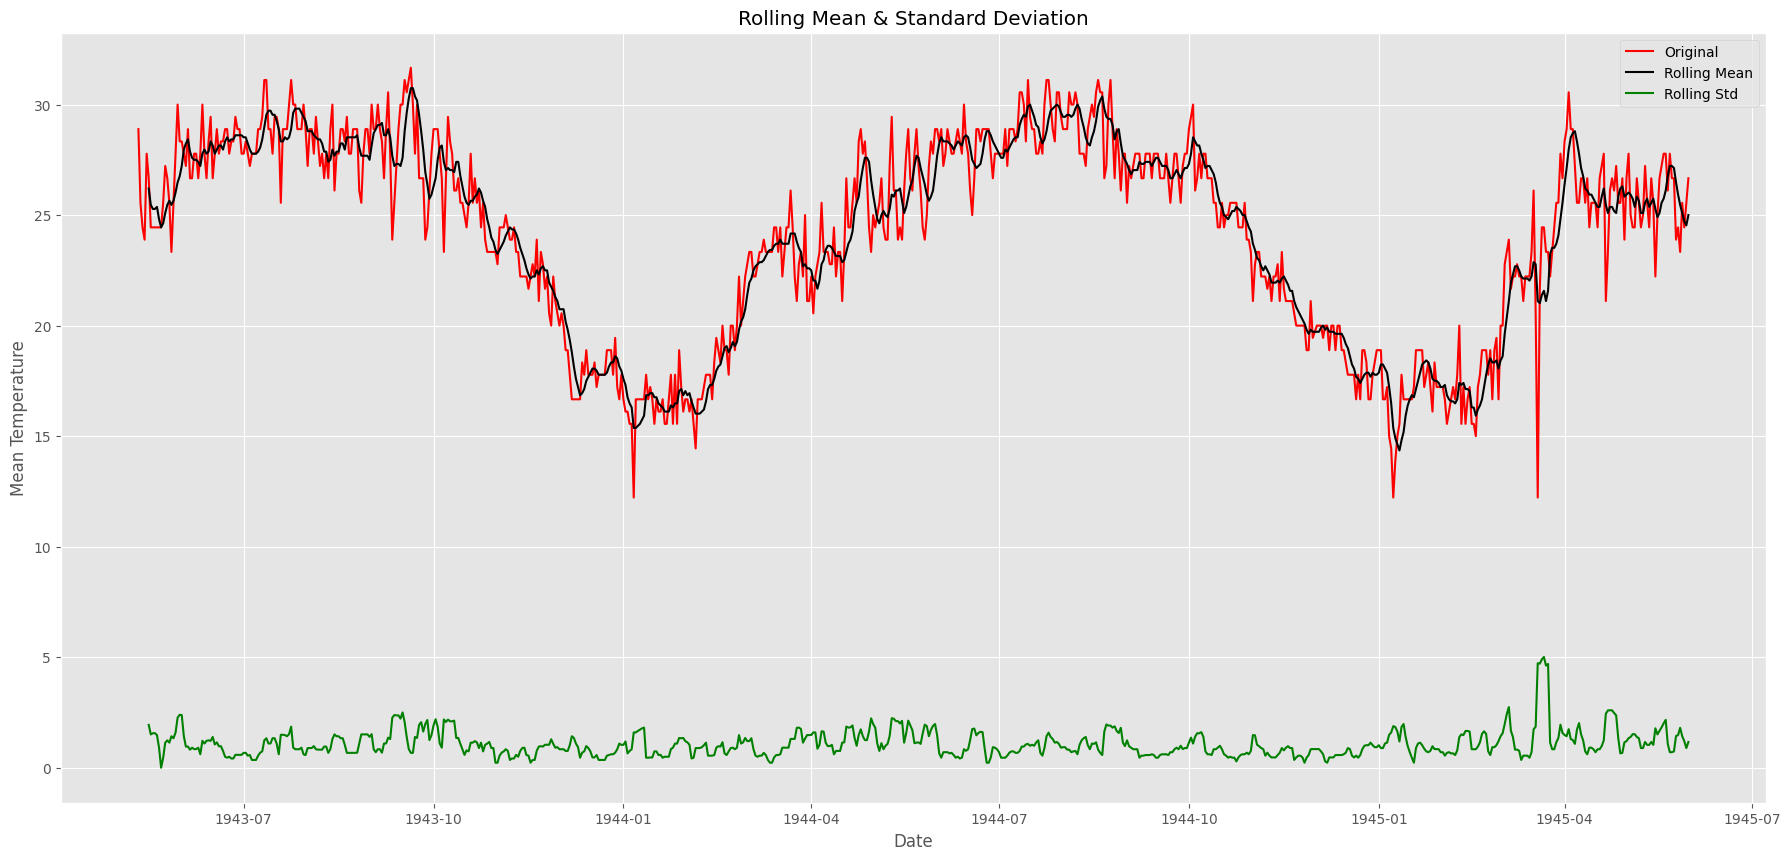

Test statistic:  -1.4095966745887767
p-value:  0.5776668028526353
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [21]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

In [22]:
# not stationary

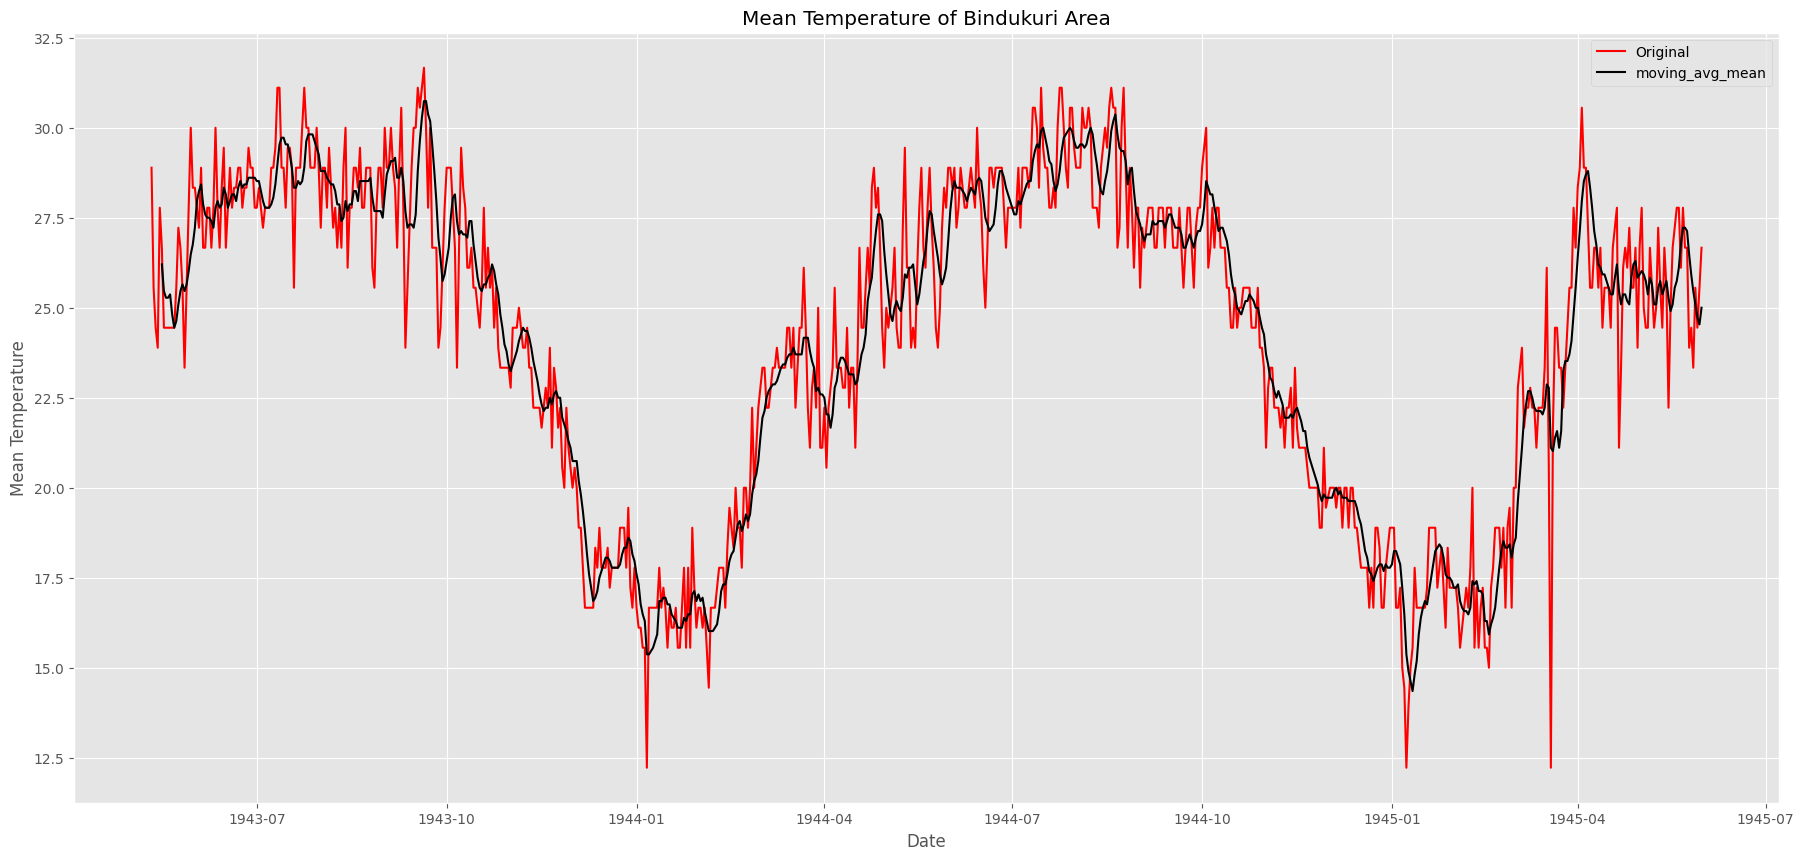

In [23]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

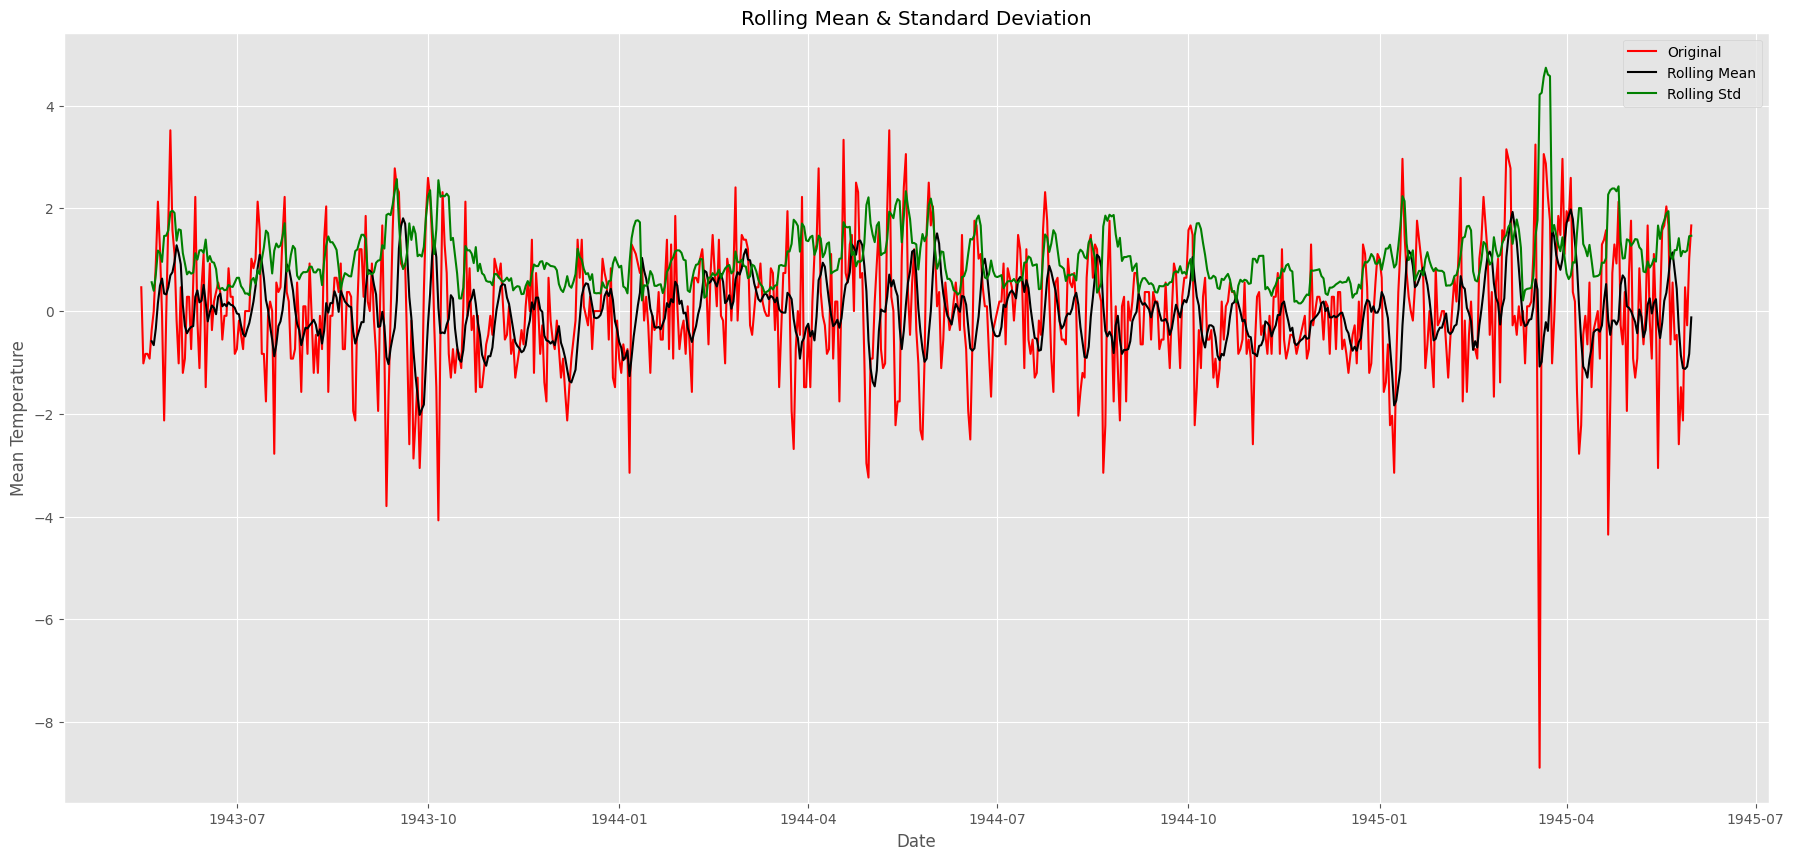

Test statistic:  -11.13851433513851
p-value:  3.1508685631640177e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [24]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

In [25]:
# stationary time series

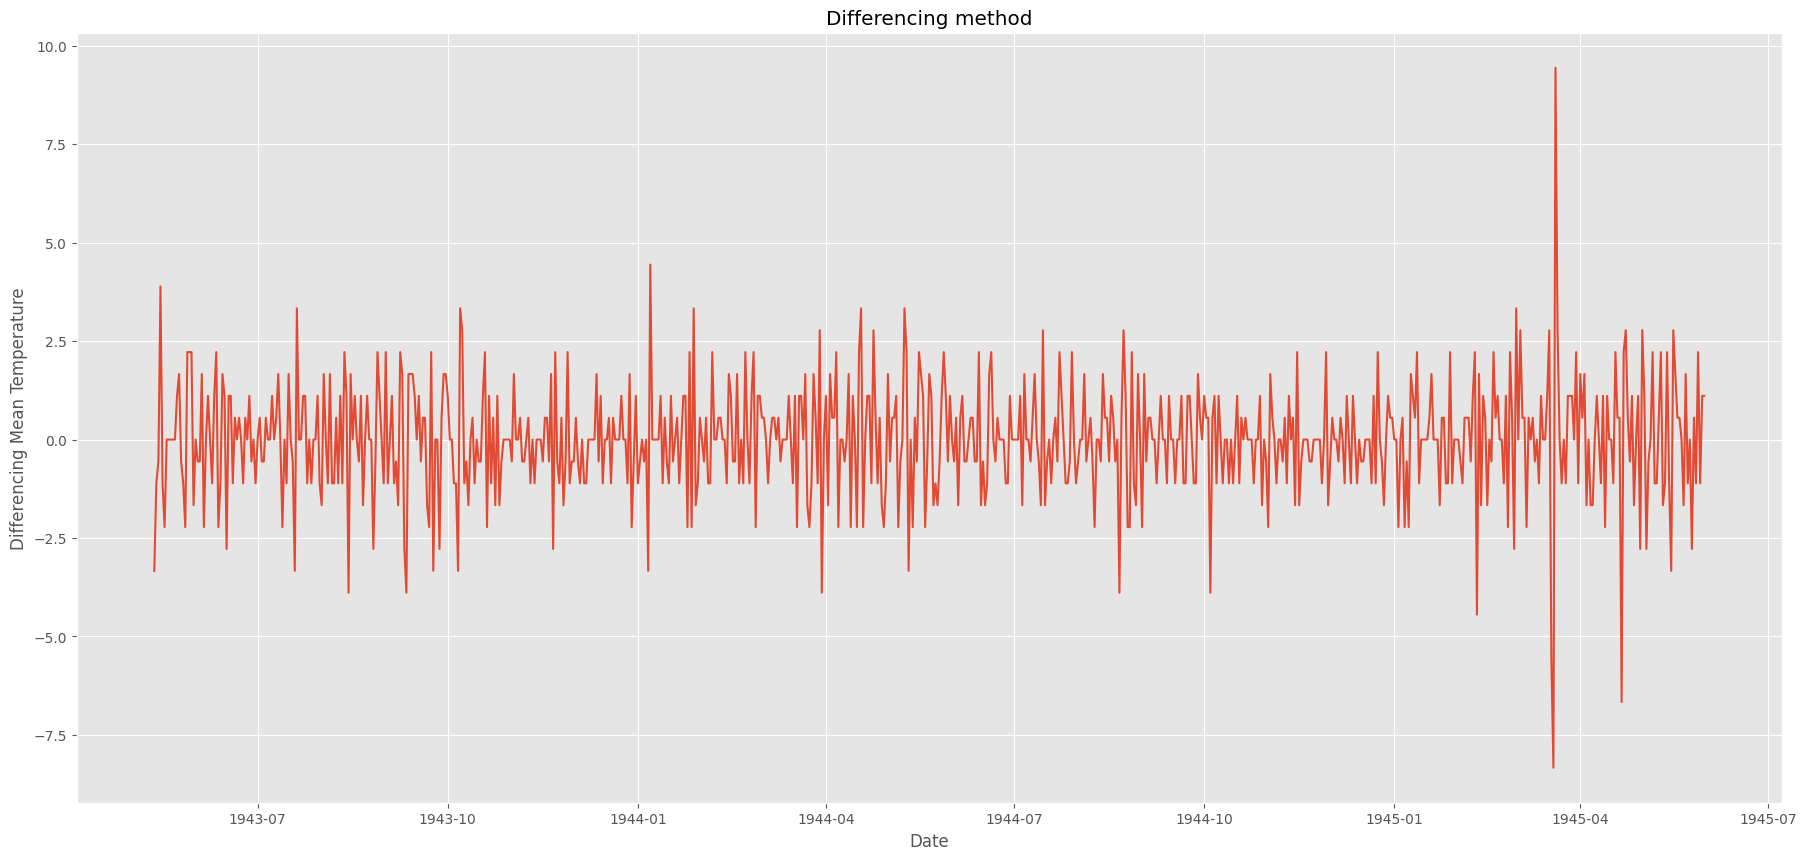

In [26]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

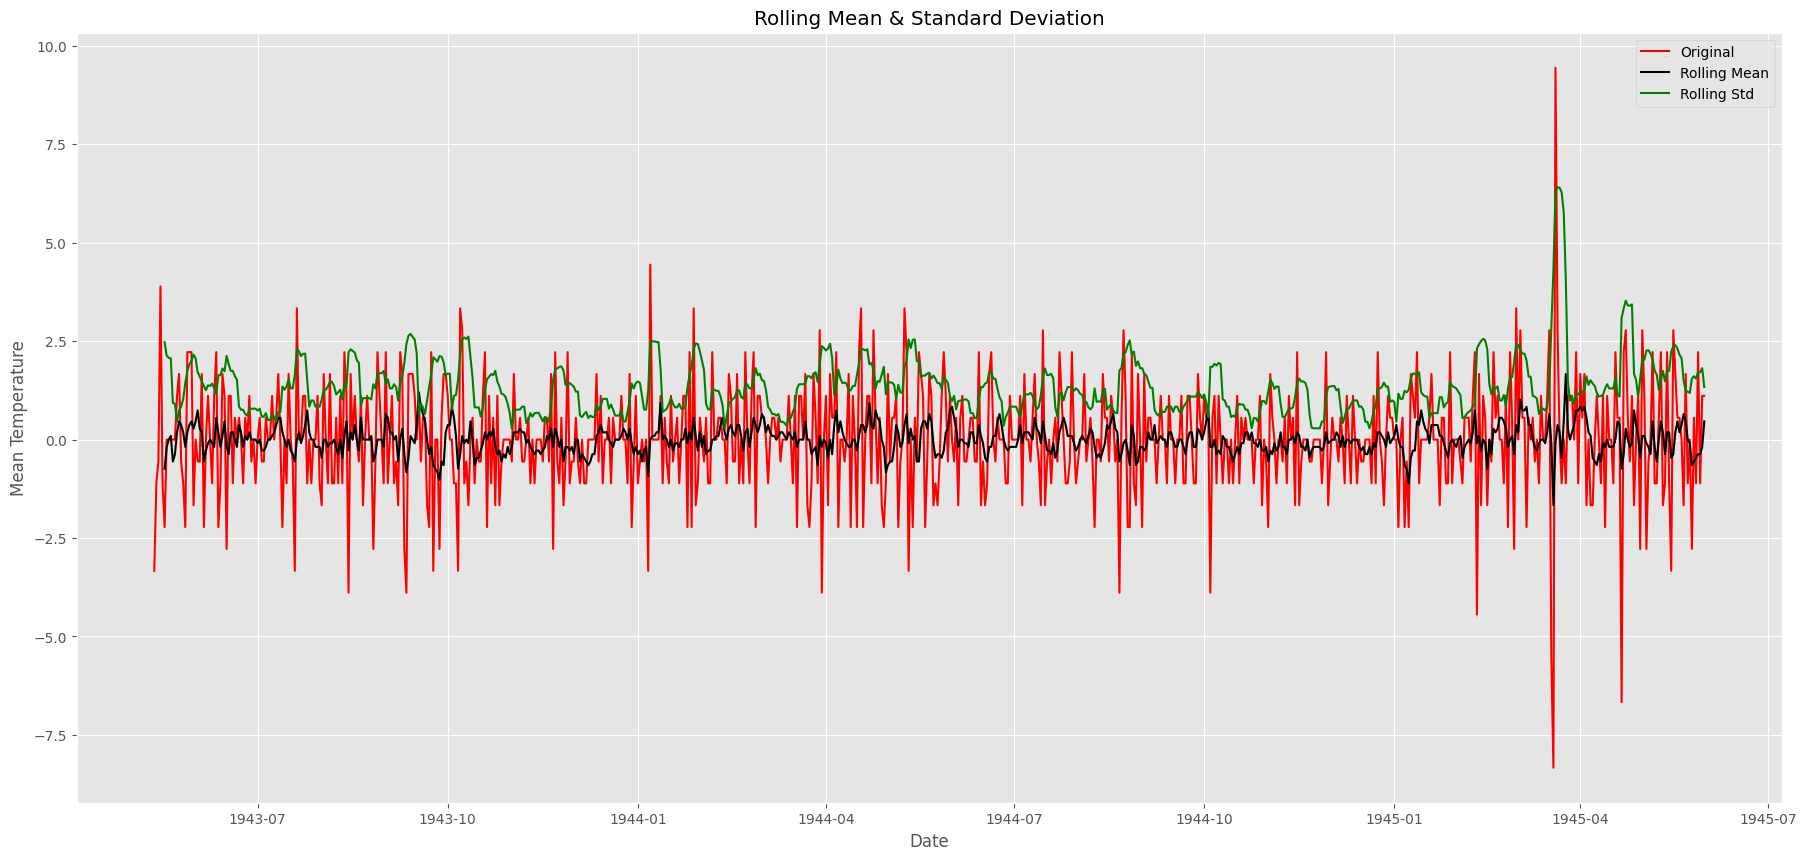

Test statistic:  -11.678955575105336
p-value:  1.76020756935625e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [27]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

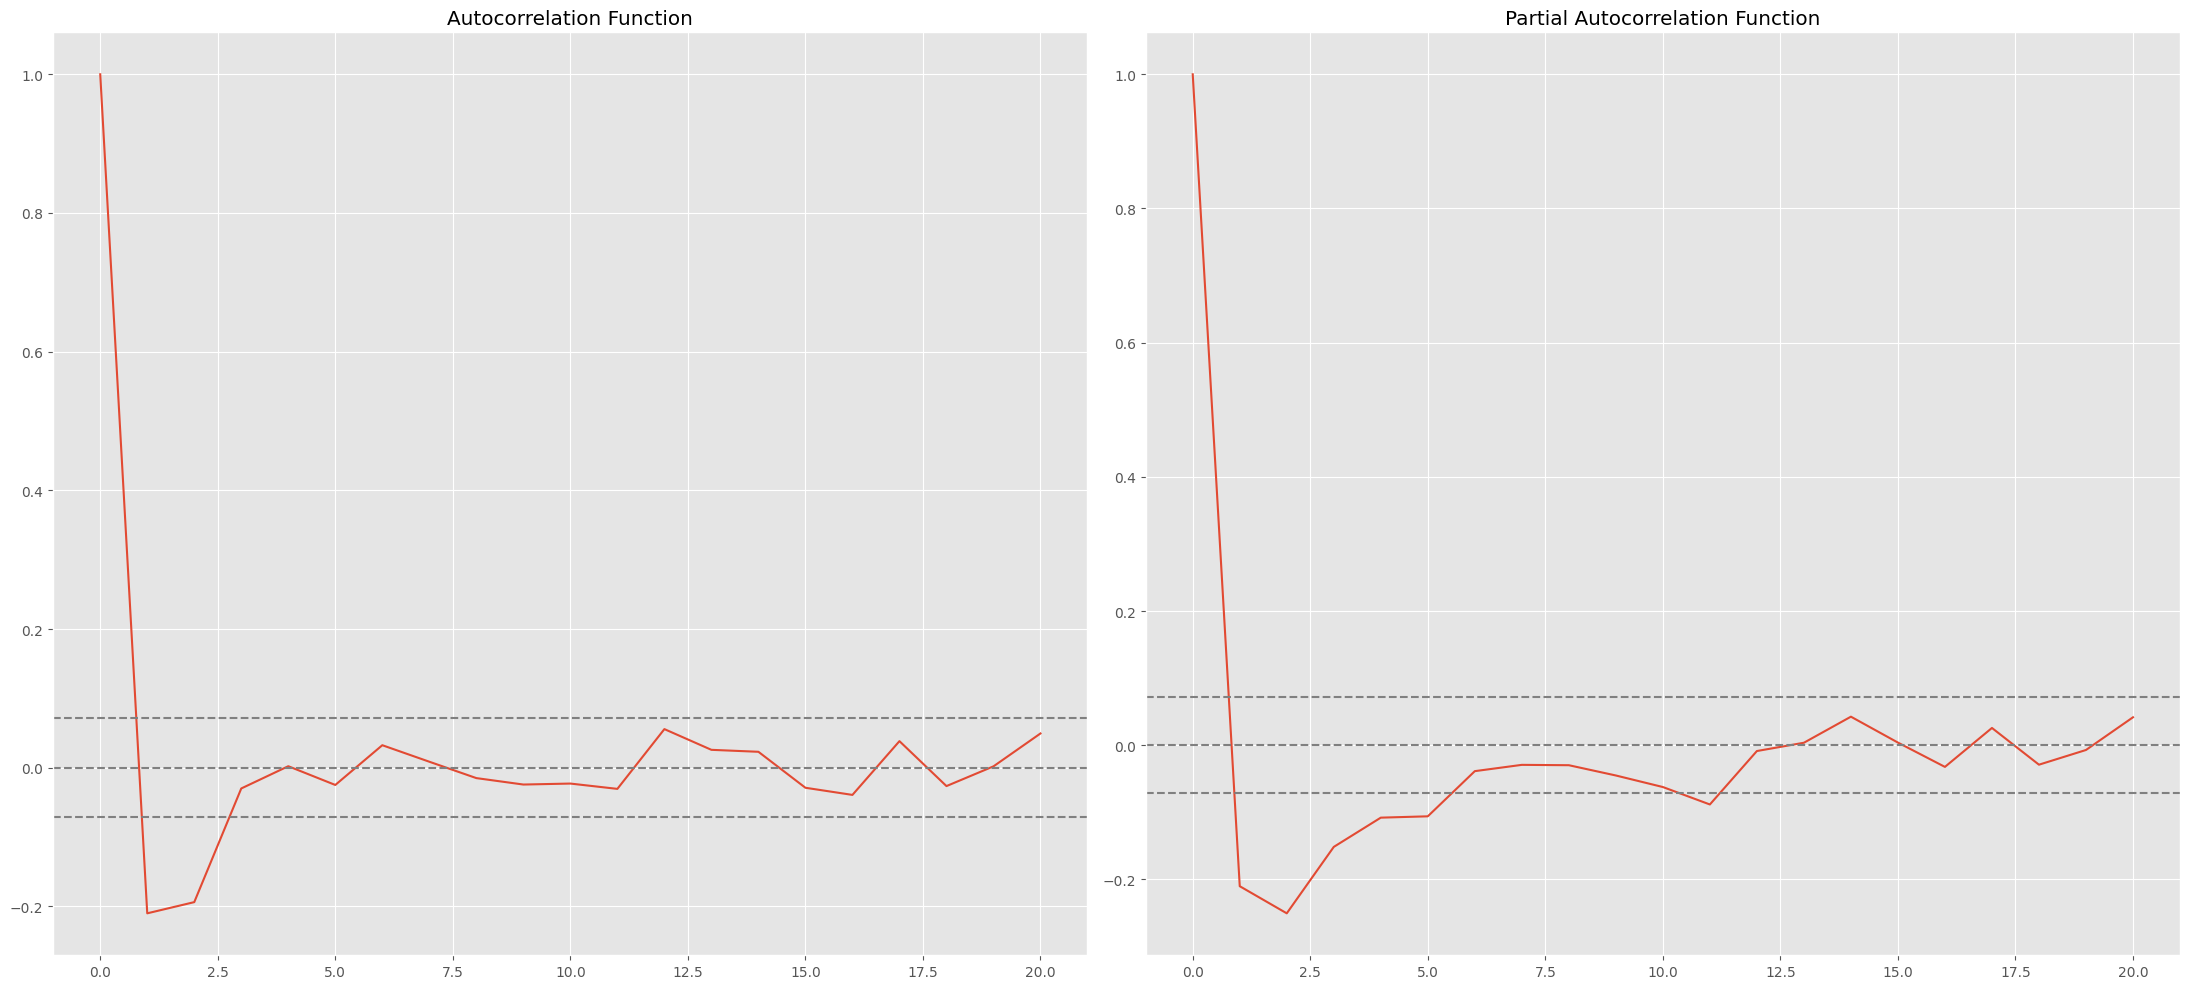

In [28]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.  

Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.

In [37]:
ts["Date"] = pd.to_datetime(ts['Date'], infer_datetime_format=True)
ts = ts.set_index(["Date"])

In [38]:
# ts = ts.reset_index()
ts

MeanTemp
Date                 
1943-05-11  28.888889
1943-05-12  25.555556
1943-05-13  24.444444
1943-05-14  23.888889
1943-05-15  27.777778
...               ...
1945-05-27  23.333333
1945-05-28  25.555556
1945-05-29  24.444444
1945-05-30  25.555556
1945-05-31  26.666667

[751 rows x 1 columns]

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



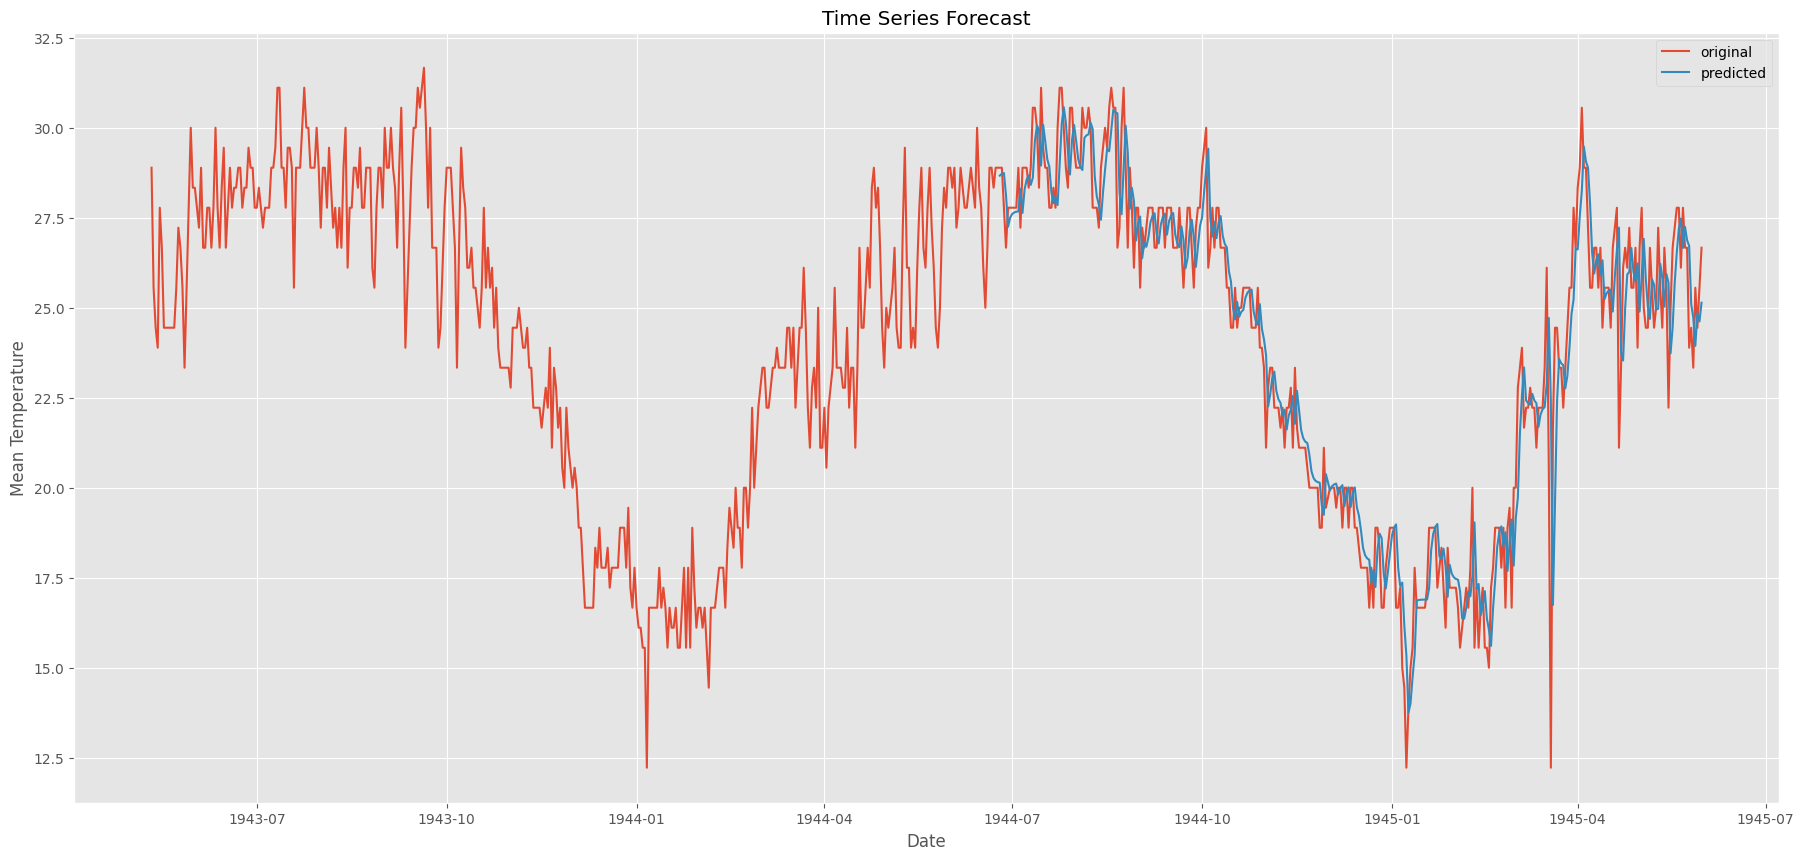

In [40]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA
# from pandas import datetime
from datetime import datetime, date, time, timezone

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
start_index = pd.to_datetime('1944-06-25')
end_index = pd.to_datetime('1945-05-31')
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\AI\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



error:  1.8625810282529904


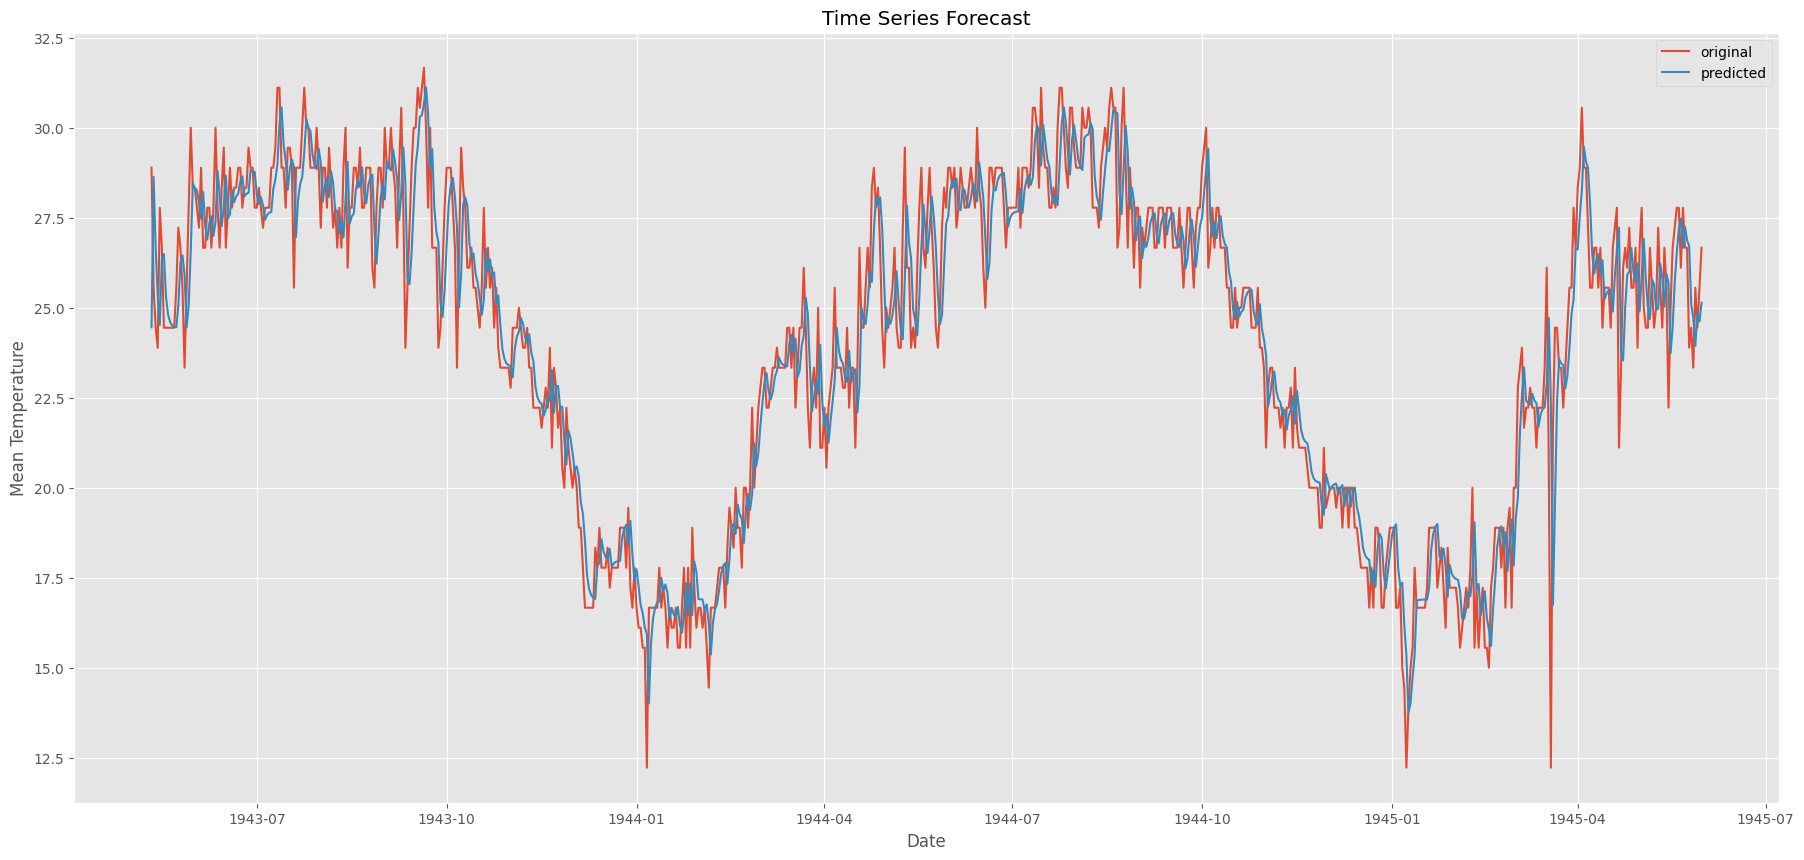

In [42]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()